# Statistics with `statsmodels`

The Python package `statsmodels` uses `NumPy` and `SciPy` under the hood to do complex statistics in minimal lines of code. We will explore how to do ordinary least squares (OLS) fitting with `statsmodels` and diagnosing the quality of the fit in this notebook.

The purpose of this notebook is to introduce the syntax and functionality of `statsmodels` so that the user can move on to more complex uses relatively easily.

In [1]:
import numpy, pandas
import statsmodels as sms
import statsmodels.api as sms_api
import matplotlib.pyplot as pl
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Simplest case

Let's look at how OLS fitting works with an example of simulated data

Let's look at a model that we know can be defined as: $$ y = 1 + 0.5x + 10x^2 $$

In [5]:
#Define number of samples
nsamp = 100

#Define our independent data, i.e. X
x = numpy.linspace(0.1, 10, nsamp)
X = numpy.column_stack((x / x, x, x ** 2))
#X = numpy.column_stack((x, x ** 2))

#X = sms_api.add_constant(X)

#Define our coefficients;
beta = numpy.array([1, 0.5, 10])
#beta = numpy.array([0.5, 10])

#Let's add some noise:
noise = numpy.random.normal(size = nsamp)

#Finally, given the above model, let's define our dependent variable, y
y = numpy.dot(X, beta) + noise

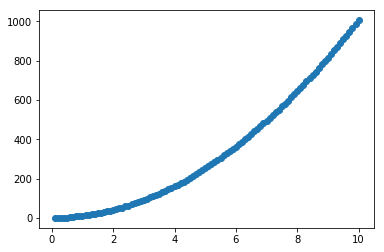

In [6]:
pl.scatter(x, y)

pl.show()

In [7]:
#Define an ordinary least squares (OLS) model object:
model = sms_api.OLS(y, X)

#Fit:
results = model.fit()

#Print summary of results:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.849e+06
Date:                Sun, 26 Jan 2020   Prob (F-statistic):          3.58e-247
Time:                        12:23:54   Log-Likelihood:                -128.03
No. Observations:                 100   AIC:                             262.1
Df Residuals:                      97   BIC:                             269.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8529      0.271      3.152      0.0

In [8]:
#We can extract the parameters like so:
print("The best-fit parameters are: {}".format(results.params))
#And errors:
print("Standard errors: {}".format(results.bse))

#And goodness-of-fit, which in this case is the R-squared metric:
print(r"$R^2$ is: {}".format(results.rsquared))

The best-fit parameters are: [ 0.85287473  0.49381132 10.00045403]
Standard errors: [0.27056023 0.12365338 0.0118616 ]
$R^2$ is: 0.9999917082393845


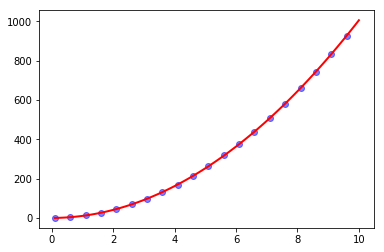

In [9]:
pl.scatter(x[::5], y[::5], alpha = 0.5, color = 'b')

pl.plot(x, results.predict(X), lw = 2, color = 'r')

pl.show()

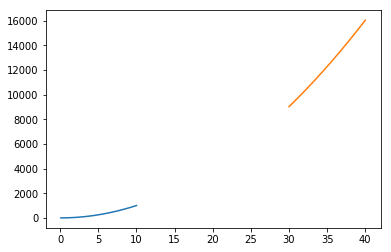

In [10]:
#Extrapolate:
x_new = numpy.linspace(30, 40, 10)

X_new = numpy.column_stack((x_new / x_new, x_new, x_new ** 2))

pl.plot(x, results.predict(X))

pl.plot(x_new, results.predict(X_new))

pl.show()

### Symbolic fitting:
The cool thing about `statsmodels` is that it also offers a way of defining symbolic formulae in its fitting, similar to the language `R`. This uses the `patsty` python package behind the scenes.

In [11]:
#For this to work, the data needs to be in a dataframe, with the column names representing the 
#name of the variable:
data_array = numpy.column_stack((y, X))
data = pandas.DataFrame(data_array, columns = ['y', 'const', 'x', 'x2'])

data.head()

,y,const,x,x2
0,1.681040,1.0,0.1,0.01
1,1.552226,1.0,0.2,0.04
2,1.196897,1.0,0.3,0.09
3,3.038102,1.0,0.4,0.16
4,2.986676,1.0,0.5,0.25


In [12]:
#We need a different module from the package first:
import statsmodels.formula.api as smf

#Let's use symbolic notation in our fitting this time:

model_2 = smf.ols(formula = 'y ~ const + x + x2 - 1', data = data)

results = model_2.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.849e+06
Date:                Sun, 26 Jan 2020   Prob (F-statistic):          3.58e-247
Time:                        12:24:04   Log-Likelihood:                -128.03
No. Observations:                 100   AIC:                             262.1
Df Residuals:                      97   BIC:                             269.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8529      0.271      3.152      0.0

# Work with our real data!

In [13]:
full_data = pandas.read_csv("final_dataset.csv")

full_data.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,carrier_lg_full_name,large_ms,fare_lg,carrier_low,carrier_low_full_name,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2004,2,33851,34027,"Oklahoma City, OK","West Palm Beach/Palm Beach, FL",1197,10.87,242.51,DL,Delta Air Lines Inc.,0.51,235.98,DL,Delta Air Lines Inc.,0.51,235.98,0,"Oklahoma City, OK\n(35.468494, -97.521264)","West Palm Beach/Palm Beach, FL\n(33.90976, -98..."
1,2012,2,31454,30476,"Orlando, FL","Shreveport, LA",796,40.10,271.03,DL,Delta Air Lines Inc.,0.64,252.43,DL,Delta Air Lines Inc.,0.64,252.43,0,"Orlando, FL\n(28.538331, -81.378879)","Shreveport, LA\n(32.51424, -93.747757)"
2,2013,3,31267,32448,"Dayton, OH","Jackson/Vicksburg, MS",617,12.06,270.00,DL,Delta Air Lines Inc.,0.64,267.98,DL,Delta Air Lines Inc.,0.64,267.98,0,"Dayton, OH\n(39.760982, -84.192203)","Jackson/Vicksburg, MS\n(30.325968, -81.65676)"
3,1999,2,33360,30852,"Melbourne, FL","Washington, DC (Metropolitan Area)",796,90.54,180.30,DL,Delta Air Lines Inc.,0.96,177.83,DL,Delta Air Lines Inc.,0.96,177.83,0,"Melbourne, FL\n(28.079931, -80.603516)","Washington, DC (Metropolitan Area)\n(38.892062..."
4,2013,1,31871,32600,"Greenville/Spartanburg, SC","Little Rock, AR",569,10.77,300.34,DL,Delta Air Lines Inc.,0.68,292.30,DL,Delta Air Lines Inc.,0.68,292.30,0,"Greenville/Spartanburg, SC\n(44.513288, -88.01...","Little Rock, AR\n(34.748745, -92.275105)"


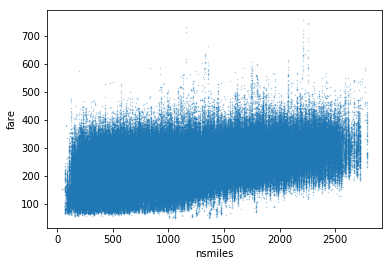

In [14]:
full_data.plot(kind = 'scatter', x = 'nsmiles', y = 'fare', s = 0.2, alpha = 0.4)

pl.show()

In [15]:
rd_model = smf.ols(formula = 'fare ~ nsmiles', data = full_data)
rd_result = rd_model.fit()

print(rd_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                 1.173e+05
Date:                Sun, 26 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:24:21   Log-Likelihood:            -2.8893e+06
No. Observations:              520323   AIC:                         5.779e+06
Df Residuals:                  520321   BIC:                         5.779e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    178.2615      0.176   1012.633      0.0

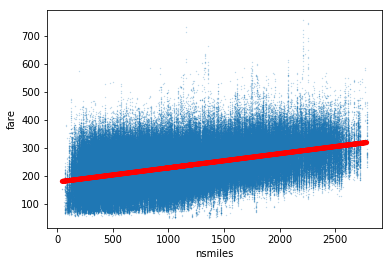

In [16]:
#Plot the fit:
full_data.plot(kind = 'scatter', x = 'nsmiles', y = 'fare', s = 0.1, alpha = 0.4)

pl.plot(full_data['nsmiles'], rd_result.predict(full_data[['nsmiles']]), lw = 5, color = 'r')

pl.show()

*********
### _Exercise_:

Repeat the above procedure, but now include the number of passengers as another independent variable.

In [17]:
rd_model_2 = smf.ols(formula = 'fare ~ nsmiles + passengers', data = full_data)
rd_model2_result = rd_model_2.fit()

print(rd_model2_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                 6.821e+04
Date:                Sun, 26 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:24:31   Log-Likelihood:            -2.8817e+06
No. Observations:              520323   AIC:                         5.763e+06
Df Residuals:                  520320   BIC:                         5.763e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    181.1089      0.175   1035.160      0.0

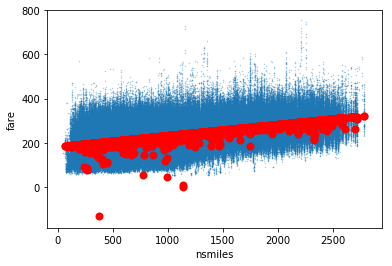

In [18]:
#Plot the fit:
full_data.plot(kind = 'scatter', x = 'nsmiles', y = 'fare', alpha = 0.4, s = 0.2)

pl.scatter(full_data['nsmiles'][::100], rd_model2_result.predict(full_data[['nsmiles', 'passengers']])[::100], 
        lw = 2, color = 'r')

pl.show()

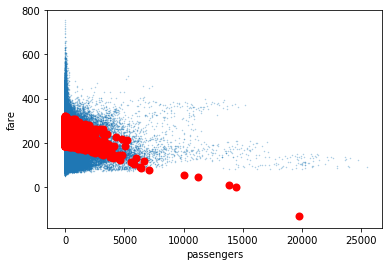

In [19]:
#Plot the fit:
full_data.plot(kind = 'scatter', x = 'passengers', y = 'fare', alpha = 0.4, s = 0.2)

pl.scatter(full_data['passengers'][::100], rd_model2_result.predict(full_data[['nsmiles', 'passengers']])[::100], 
        lw = 2, color = 'r')

pl.show()

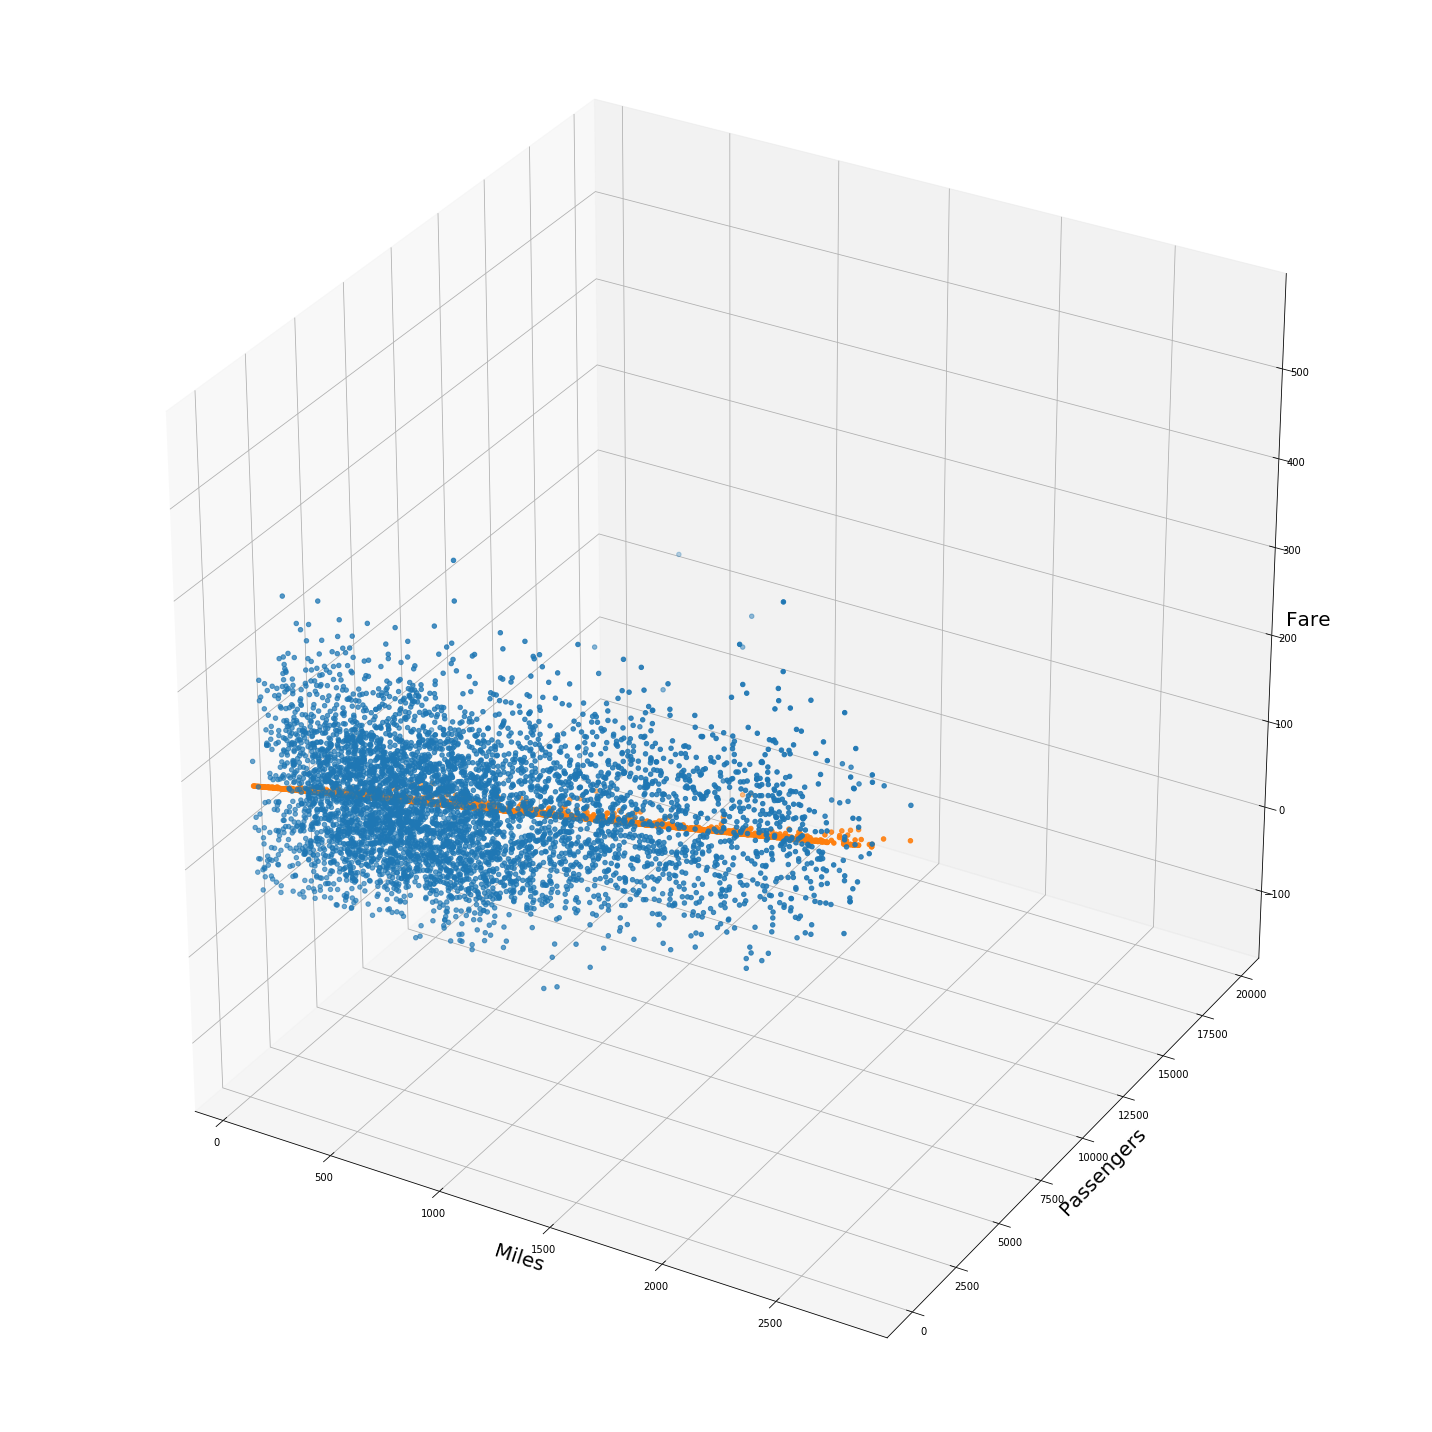

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = pl.figure(figsize = (20, 20))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(full_data['nsmiles'][::100], full_data['passengers'][::100], full_data['fare'][::100])

ax.scatter(full_data['nsmiles'][::100], full_data['passengers'][::100], 
          rd_model2_result.predict(full_data[['nsmiles', 'passengers']])[::100])

ax.set_xlabel("Miles", fontsize = 20)
ax.set_ylabel("Passengers", fontsize = 20)
ax.set_zlabel("Fare", fontsize = 20)

pl.tight_layout()
pl.show()

There is a lot more to be done with `statsmodels`that it cannot be covered in one notebook/workshop. Below we quickly look at a few more features offered in `statsmodels`, but leave more detailed stuff to other resources.

## Plotting using `statsmodels`

`statsmodels` provides a built-in library which is designed to produce diagnostic and visualizations of the model that we fit to data.

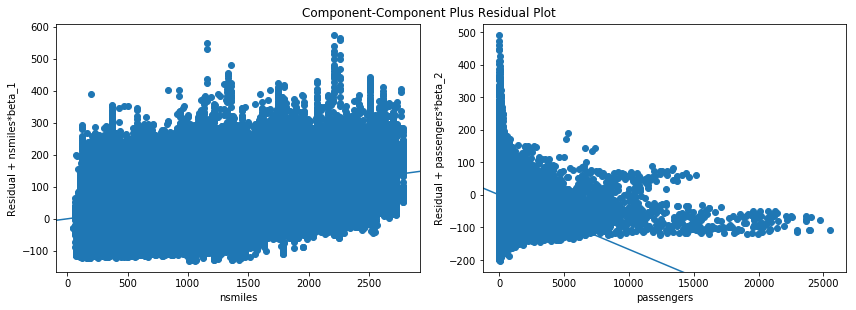

In [30]:
#An example of the plotting library:

#Let's plot the Component and Component Plus Residual (CCPR) plots

fig = pl.figure(figsize = (12, 8))

fig = sms_api.graphics.plot_ccpr_grid(rd_model2_result, fig = fig)

pl.show()

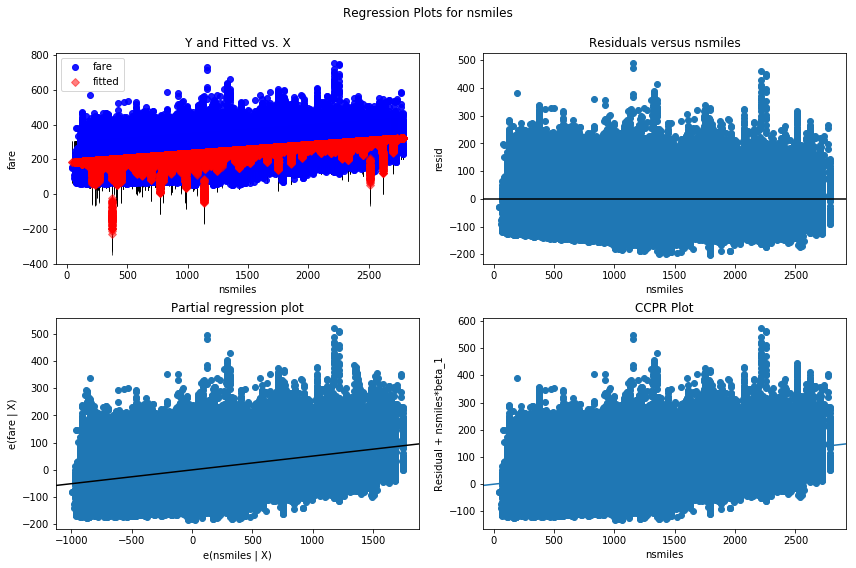

In [31]:
#A way to summarize the fit for each of the independent variables:

fig = pl.figure(figsize = (12,8))
fig = sms_api.graphics.plot_regress_exog(rd_model2_result, "nsmiles", fig = fig)

pl.show()

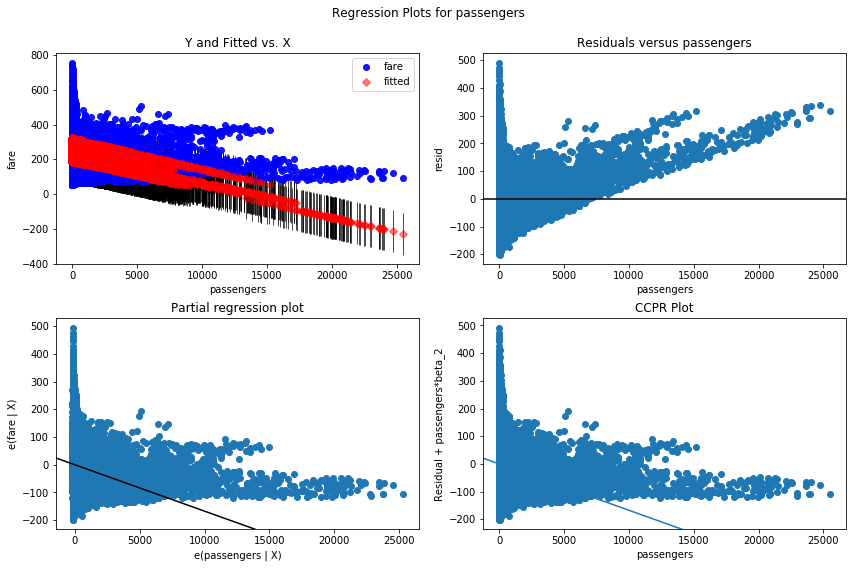

In [35]:
#Another way to summarize the fit for each of the independent variables:

fig = pl.figure(figsize = (12,8))
fig = sms_api.graphics.plot_regress_exog(rd_model2_result, "passengers", fig = fig)

pl.show()

## More advanced model fitting

So far, we have been doing model fitting where the dependence was linear in the independent parameters. Let's look at how to add non-linearities

In [51]:
#Let's fit the fares as a function of distance and passengers^2

model3 = smf.ols(formula = "fare ~ nsmiles + I(passengers ** 2)", data = full_data)
model3_result = model3.fit()

print(model3_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                 5.961e+04
Date:                Sun, 26 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:20:03   Log-Likelihood:            -2.8886e+06
No. Observations:              520323   AIC:                         5.777e+06
Df Residuals:                  520320   BIC:                         5.777e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            178.4979      0

In [49]:
#Let's fit the fares as a function of log10(distance) and passengers

model4 = smf.ols(formula = 'fare ~ numpy.log10(nsmiles) + passengers', data = full_data)
model4_results = model4.fit()

print(model4_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                 5.554e+04
Date:                Sun, 26 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:19:10   Log-Likelihood:            -2.8919e+06
No. Observations:              520323   AIC:                         5.784e+06
Df Residuals:                  520320   BIC:                         5.784e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -61.5832 

In [42]:
#Multiplying two things together:

model5 = smf.ols(formula = "fare ~ nsmiles * passengers", data = full_data)
model5_results = model5.fit()

print(model5_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                 4.560e+04
Date:                Sun, 26 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:11:51   Log-Likelihood:            -2.8815e+06
No. Observations:              520323   AIC:                         5.763e+06
Df Residuals:                  520319   BIC:                         5.763e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            181.8093      0

In [47]:
#Multiplying two things together, but only keeping the product:

model6 = smf.ols(formula = "fare ~ nsmiles : passengers", data = full_data)
model6_results = model6.fit()

print(model6_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     898.3
Date:                Sun, 26 Jan 2020   Prob (F-statistic):          3.39e-197
Time:                        16:18:43   Log-Likelihood:            -2.9418e+06
No. Observations:              520323   AIC:                         5.884e+06
Df Residuals:                  520321   BIC:                         5.884e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            231.4752      0

In [55]:
#There's built-in ability to deal with categorical variables:

#Multiplying two things together:

model7 = smf.ols(formula = "fare ~ nsmiles + passengers + C(table_1_flag)", data = full_data)
model7_results = model7.fit()

print(model7_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                 4.375e+04
Date:                Sun, 26 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:51:49   Log-Likelihood:            -2.8668e+06
No. Observations:              520323   AIC:                         5.734e+06
Df Residuals:                  520318   BIC:                         5.734e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              168.7700 